In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
# !pip install textattack

In [38]:
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('../streamline/complete_set.csv')
# train, test = train_test_split(data, test_size=0.2, random_state=42)
print(data.shape)

(35047, 25)


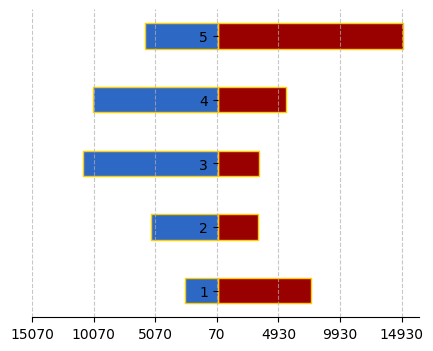

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Data
y1_axis = [7610, 3242, 3377, 5536, 15070]
y2_axis = [2689, 5398, 10921, 10141, 5898]
x_axis = [1, 2, 3, 4, 5]

# Create a bidirectional bar chart
fig, ax = plt.subplots(figsize=(5, 4))

# Plot y1_axis (left side bars)
ax.barh(x_axis, y1_axis, color='#990000', edgecolor='#FFCC00', height=0.4, align='center', label='y1_axis (left)')

# Plot y2_axis (right side bars)
ax.barh(x_axis, [-val for val in y2_axis], color='#2D68C4', edgecolor='#FFCC00', height=0.4, align='center', label='y2_axis (right)')

# Add labels, title, and legend
# ax.set_xlabel('Frequency')
# ax.set_title('Bidirectional Bar Chart')

# Set y-axis in the center
ax.spines['left'].set_position(('data', 0))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

# Add grid for clarity
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust x-ticks to show absolute values for the right-side bars
ax.set_xticks(range(-max(max(y1_axis), max(y2_axis)), max(max(y1_axis), max(y2_axis)) + 1, 5000))
ax.set_xticklabels([abs(val) for val in ax.get_xticks()])

plt.show()



Plot has been saved as dist.png


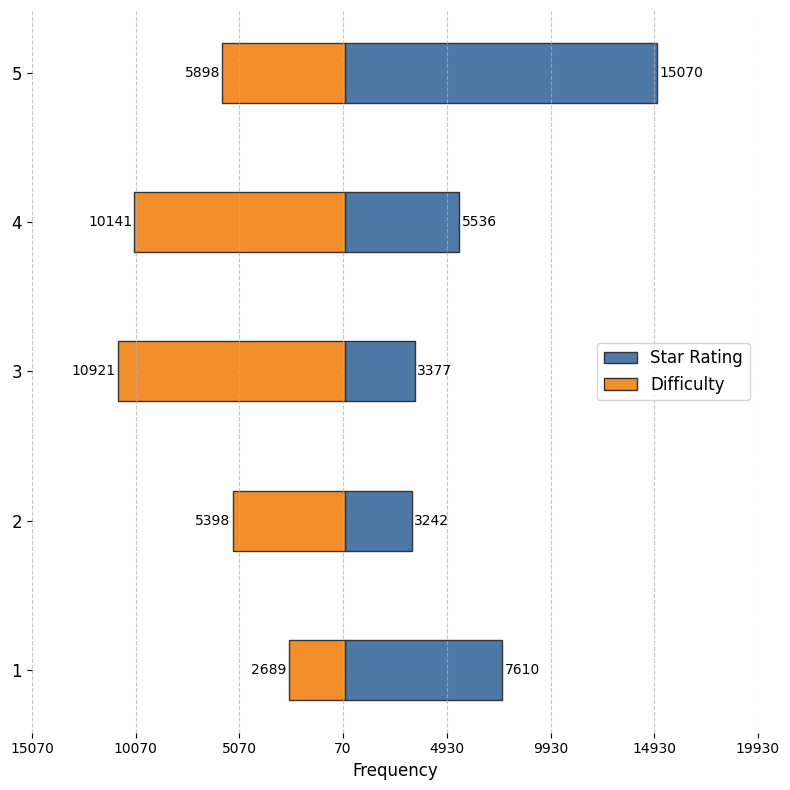

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Data
y1_axis = [7610, 3242, 3377, 5536, 15070]
y2_axis = [2689, 5398, 10921, 10141, 5898]
categories = [1, 2, 3, 4, 5]
# categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
y_positions = np.arange(len(categories))

# Colors (color-blind friendly)
color_y1 = '#4e79a7'  # Blue
color_y2 = '#f28e2c'  # Orange
edge_color = '#333333'  # Dark gray for edges

# Create a bidirectional bar chart
fig, ax = plt.subplots(figsize=(8, 8))

# Plot y1_axis (left side bars)
bars_y1 = ax.barh(y_positions, y1_axis, color=color_y1, edgecolor=edge_color, height=0.4, align='center', label='Star Rating')

# Plot y2_axis (right side bars)
bars_y2 = ax.barh(y_positions, [-val for val in y2_axis], color=color_y2, edgecolor=edge_color, height=0.4, align='center', label='Difficulty')

# Add labels and title
ax.set_xlabel('Frequency', fontsize=12)
# ax.set_title('Distribution of Rating and Difficulty Score', fontsize=14, fontweight='bold')

# Set y-axis labels
ax.set_yticks(y_positions)
ax.set_yticklabels(categories, fontsize=12)

# Customize x-axis ticks
max_val = max(max(y1_axis), max(y2_axis))
tick_step = 5000
ticks = np.arange(-max_val, max_val + tick_step, tick_step)
ax.set_xticks(ticks)
ax.set_xticklabels([f'{abs(int(t))}' for t in ticks], fontsize=10)

# Remove spines for a cleaner look
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Add grid for clarity
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Add legend
ax.legend(loc='center right', fontsize=12)

# Add value annotations to bars
for bar in bars_y1:
    width = bar.get_width()
    ax.text(width + 100, bar.get_y() + bar.get_height()/2, f'{width}', va='center', fontsize=10)

for bar in bars_y2:
    width = bar.get_width()
    ax.text(width - 100, bar.get_y() + bar.get_height()/2, f'{abs(width)}', va='center', ha='right', fontsize=10)

# Adjust layout for better fit
plt.tight_layout()

# Define the filename and format
filename = 'dist.png'  # Change the extension for different formats

# Save the figure
plt.savefig(
    filename,
    format='png',       # Change to 'pdf', 'svg', etc., if needed
    dpi=600,            # Higher dpi for better quality
    bbox_inches='tight',# Ensures everything fits without clipping
    transparent=False    # Set to True if you need a transparent background
)

# Optional: Inform the user that the plot has been saved
print(f'Plot has been saved as {filename}')
# Display the plot
plt.show()

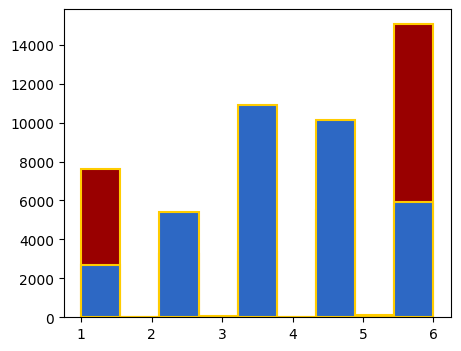

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data
y1_axis = [7610, 39, 3242, 45, 3377, 35, 5536, 93, 15070]
y2_axis = [2689, 0, 5398, 0, 10921, 0, 10141, 0, 5898]
x_axis = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]

# Extend x_axis if needed
if len(x_axis) < len(y1_axis):
    x_axis.extend([x_axis[-1] + 0.5 * i for i in range(1, len(y1_axis) - len(x_axis) + 1)])

# Define bins and weights
bins = np.linspace(min(x_axis), max(x_axis), len(y1_axis) + 1)
# counts = y_axis  # Use y_axis as the weights

# Colors
colors = ['#990000' if i % 2 == 0 else '#2D68C4' for i in range(len(counts))]

# Plot histogram
plt.figure(figsize=(5, 4))
plt.hist(bins[:-1], bins, weights=y1_axis, color=colors[0], edgecolor='#FFCC00', linewidth=1.5)
plt.hist(bins[:-1], bins, weights=y2_axis, color='#2D68C4', edgecolor='#FFCC00', linewidth=1.5)

# Add labels and title
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis (Frequency)')
# plt.title('Histogram with Custom Colors and Edge')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


[7610, 39, 3242, 45, 3377, 35, 5536, 93, 15070]


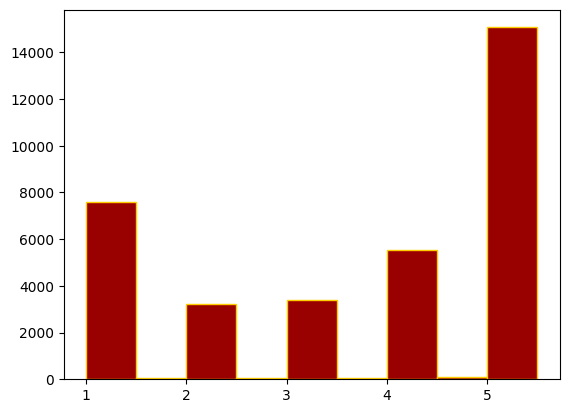

In [7]:
bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
counts = [data[data['star_rating'] == label].shape[0] for label in bins[:-1]]
print(counts)
plt.hist(bins[:-1], bins, weights=counts, color='#990000', edgecolor='#FFCC00')
plt.show()

[2689, 0, 5398, 0, 10921, 0, 10141, 0, 5898]


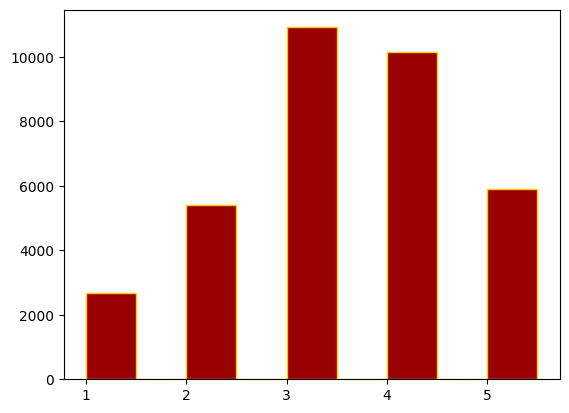

In [6]:
bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
counts = [data[data['course_difficulty'] == label].shape[0] for label in bins[:-1]]
print(counts)
plt.hist(bins[:-1], bins, weights=counts, color='#990000', edgecolor='#FFCC00')
plt.show()

gives_good_feedback         5538
caring                      6329
respected                   5722
participation_matters       4709
clear_grading_criteria      4029
amazing_lectures            5862
inspirational               3433
tough_grader                8823
hilarious                   4230
get_ready_to_read           7573
lots_of_homework            4343
accessible_outside_class    4372
lecture_heavy               6294
extra_credit                1424
graded_by_few_things        4575
group_projects              1725
would_take_again             244
skip_class_you_wont_pass    4977
test_heavy                  4636
so_many_papers              1251
beware_of_pop_quizzes        855
tests_are_tough              212
dtype: int64
Number of tags per comment:
3    25641
2     5514
1     3205
0      687
Name: count, dtype: int64


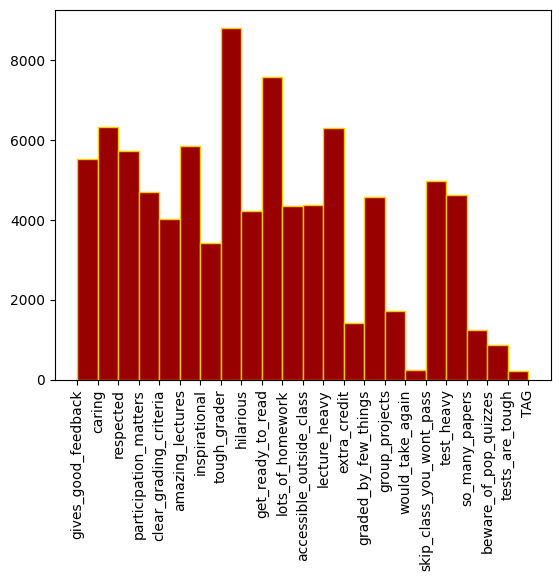

In [45]:
bins = ['gives_good_feedback',
       'caring', 'respected', 'participation_matters',
       'clear_grading_criteria', 'amazing_lectures', 'inspirational',
       'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework',
       'accessible_outside_class', 'lecture_heavy', 'extra_credit',
       'graded_by_few_things', 'group_projects', 'would_take_again',
       'skip_class_you_wont_pass', 'test_heavy', 'so_many_papers',
       'beware_of_pop_quizzes', 'tests_are_tough','TAG']
counts = [data[data[label] == 1].shape[0] for label in bins[:-1]]
print(data.drop(columns=['comment', 'star_rating', 'course_difficulty']).sum(axis=0))
print(f"Number of tags per comment:\n{data.drop(columns=['comment', 'star_rating', 'course_difficulty']).sum(axis=1).value_counts()}")
plt.hist(bins[:-1], bins, weights=counts, edgecolor='#FFCC00', color='#990000',)

plt.xticks(rotation=90)
plt.show()

gives_good_feedback         5538
caring                      6329
respected                   5722
participation_matters       4709
clear_grading_criteria      4029
amazing_lectures            5862
inspirational               3433
tough_grader                8823
hilarious                   4230
get_ready_to_read           7573
lots_of_homework            4343
accessible_outside_class    4372
lecture_heavy               6294
extra_credit                1424
graded_by_few_things        4575
group_projects              1725
would_take_again             244
skip_class_you_wont_pass    4977
test_heavy                  4636
so_many_papers              1251
beware_of_pop_quizzes        855
tests_are_tough              212
dtype: int64
Number of tags per comment:
3    25641
2     5514
1     3205
0      687
Name: count, dtype: int64


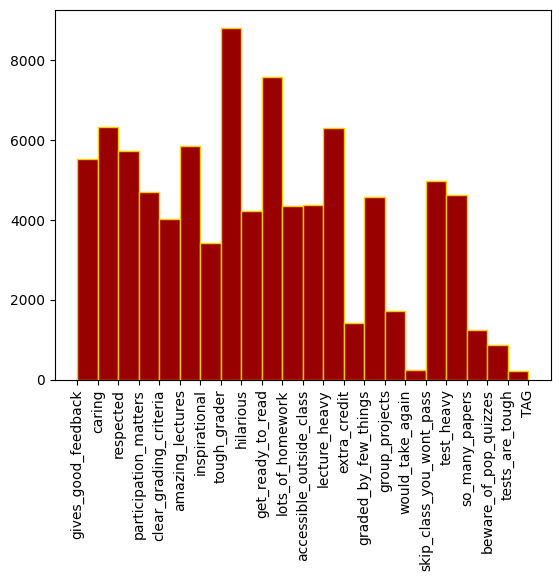

In [47]:
bins = ['gives_good_feedback',
       'caring', 'respected', 'participation_matters',
       'clear_grading_criteria', 'amazing_lectures', 'inspirational',
       'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework',
       'accessible_outside_class', 'lecture_heavy', 'extra_credit',
       'graded_by_few_things', 'group_projects', 'would_take_again',
       'skip_class_you_wont_pass', 'test_heavy', 'so_many_papers',
       'beware_of_pop_quizzes', 'tests_are_tough','TAG']
counts = [data[data[label] == 1].shape[0] for label in bins[:-1]]
print(data.drop(columns=['comment', 'star_rating', 'course_difficulty']).sum(axis=0))
print(f"Number of tags per comment:\n{data.drop(columns=['comment', 'star_rating', 'course_difficulty']).sum(axis=1).value_counts()}")
plt.hist(bins[:-1], bins, weights=counts, edgecolor='#FFCC00', color='#990000',)

plt.xticks(rotation=90)
plt.show()

Dataset loaded with shape: (35047, 25)

Sum of each tag across all comments:
gives_good_feedback         5538
caring                      6329
respected                   5722
participation_matters       4709
clear_grading_criteria      4029
amazing_lectures            5862
inspirational               3433
tough_grader                8823
hilarious                   4230
get_ready_to_read           7573
lots_of_homework            4343
accessible_outside_class    4372
lecture_heavy               6294
extra_credit                1424
graded_by_few_things        4575
group_projects              1725
would_take_again             244
skip_class_you_wont_pass    4977
test_heavy                  4636
so_many_papers              1251
beware_of_pop_quizzes        855
tests_are_tough              212
dtype: int64

Number of tags per comment:
3    25641
2     5514
1     3205
0      687
Name: count, dtype: int64


/var/folders/9f/6nsr3sh50cq554hh4yv_hjqw0000gn/T/ipykernel_71560/2872695730.py:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')  # 'Blues' colormap



Horizontal bar chart has been saved as tagdist.png


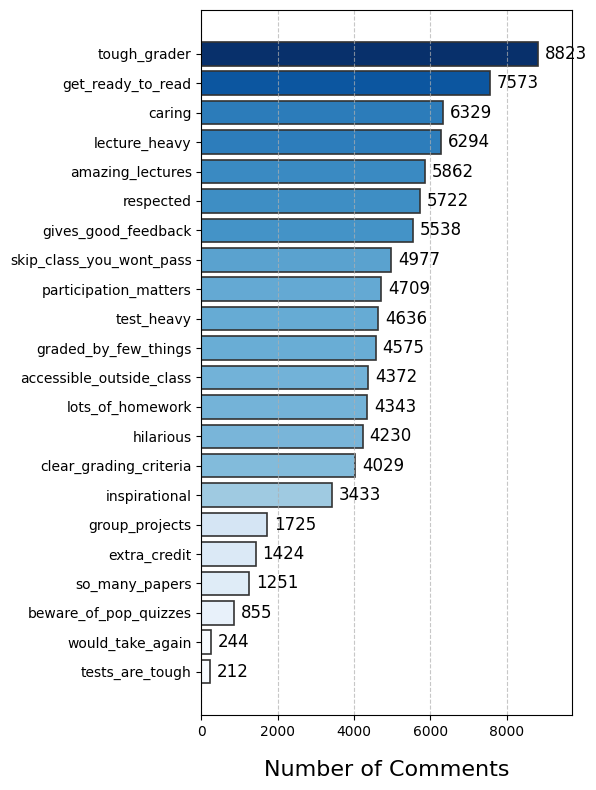

In [72]:
# -------------------------------------------
# Step 1: Data Loading and Preparation
# -------------------------------------------

# Load the dataset
# Replace the file path with the correct path to your CSV file
data = pd.read_csv('../streamline/complete_set.csv')

# Display the shape of the dataset to verify successful loading
print(f"Dataset loaded with shape: {data.shape}")

# Define the tags (bins) excluding the last item 'TAG'
bins = [
    'gives_good_feedback', 'caring', 'respected', 'participation_matters',
    'clear_grading_criteria', 'amazing_lectures', 'inspirational',
    'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework',
    'accessible_outside_class', 'lecture_heavy', 'extra_credit',
    'graded_by_few_things', 'group_projects', 'would_take_again',
    'skip_class_you_wont_pass', 'test_heavy', 'so_many_papers',
    'beware_of_pop_quizzes', 'tests_are_tough', 'TAG'
]

# Calculate counts for each tag (excluding 'TAG')
counts = [data[data[label] == 1].shape[0] for label in bins[:-1]]

# Optional: Print the sum of each tag across all comments
print("\nSum of each tag across all comments:")
print(data[bins[:-1]].sum())

# Optional: Print the number of tags per comment
tags_per_comment = data[bins[:-1]].sum(axis=1)
print("\nNumber of tags per comment:")
print(tags_per_comment.value_counts())

# -------------------------------------------
# Step 2: Sorting the Data by Frequency
# -------------------------------------------

# Create a DataFrame for easy manipulation
df = pd.DataFrame({'Tag': bins[:-1], 'Count': counts})

# Sort the DataFrame by 'Count' in descending order
df_sorted = df.sort_values(by='Count', ascending=False)

# Extract sorted tags and counts
sorted_tags = df_sorted['Tag']
sorted_counts = df_sorted['Count']

# -------------------------------------------
# Step 3: Creating the Horizontal Bar Chart
# -------------------------------------------

# Initialize the plot with a specified figure size
plt.figure(figsize=(10, 12))  # Adjust the size as needed

# Define colors
# Use a colormap that transitions from deep blue to light blue
cmap = cm.get_cmap('Blues')  # 'Blues' colormap
normalize = mcolors.Normalize(vmin=min(sorted_counts), vmax=max(sorted_counts))
colors = cmap(normalize(sorted_counts))

# Create the horizontal bar chart
bars = plt.barh(
    sorted_tags,    # Sorted Tags on the y-axis
    sorted_counts,  # Sorted Frequencies on the x-axis
    color=colors,   # Colors mapped based on frequency
    edgecolor='#333333',  # Dark Gray for bar edges
    linewidth=1.2
)

# Invert y-axis to have the highest frequency on top
plt.gca().invert_yaxis()

# Add titles and labels
# plt.title('Frequency Distribution of Course Feedback Tags', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Number of Comments', fontsize=16, labelpad=15)
# plt.ylabel('Tags', fontsize=16, labelpad=15)

# Add gridlines for the x-axis
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Determine the maximum count value
max_count = max(sorted_counts)

# Set x-axis limit to a bit higher than the maximum count
plt.xlim(0, max_count * 1.1)  # Increase x-axis limit by 10%

# Add value annotations to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max_count * 0.02,     # Position slightly to the right of the bar
        bar.get_y() + bar.get_height() / 2,
        f'{int(width)}',              # Text to display (converted to integer for cleaner look)
        ha='left',                    # Horizontal alignment
        va='center',                  # Vertical alignment
        fontsize=12
    )

# Add a colorbar to represent the frequency scale
# sm = cm.ScalarMappable(cmap=cmap, norm=normalize)
# sm.set_array([])
# cbar = plt.colorbar(sm, orientation='vertical', pad=0.02)
# cbar.set_label('Number of Comments', fontsize=14)

# Adjust layout to ensure everything fits without overlap
plt.tight_layout()

# -------------------------------------------
# Step 4: Saving the Plot
# -------------------------------------------

# Define the filename and format
filename = 'tagdist.png'  # Change extension to 'pdf', 'svg', etc., if needed

# Save the figure with high resolution
plt.savefig(
    filename,
    format='png',           # Change to 'pdf', 'svg', etc., if needed
    dpi=300,                # Higher dpi for better quality
    bbox_inches='tight',    # Ensures everything fits without clipping
    transparent=False       # Set to True for a transparent background
)

# Inform the user that the plot has been saved
print(f'\nHorizontal bar chart has been saved as {filename}')

# -------------------------------------------
# Step 5: Displaying the Plot
# -------------------------------------------

plt.show()


In [38]:
# from textattack.augmentation import EmbeddingAugmenter, WordNetAugmenter, CharSwapAugmenter

# text = "Trouble is, if you have different opinions on the topics you talk about then she won\'t like you. As long as you stick to what she lays out you should be good. She wants very badly to have students she molds, if she can\'t mold you she\'ll throw you away."

# ea = EmbeddingAugmenter()
# wna = WordNetAugmenter()
# csa = CharSwapAugmenter()

# augmented_text = ea.augment(wna.augment(csa.augment(text)[0])[0])[0]

# print(f"Original Text: {text}")
# print(f"Augmented Text: {augmented_text}")

In [39]:
# # Create a list of dataframes to be concatenated
# dfs = [train[train['student_star'] == star] for star in [1.5, 2, 2.5, 3, 3.5]]

# # Concatenate the dataframes
# temp = pd.concat(dfs, ignore_index=True)

# print(temp.shape)

In [40]:
# dfs[0]['comments'] = dfs[0]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
# print(dfs[0]['comments'].head())

In [ ]:
dfs[1]['comments'] = dfs[1]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[1]['comments'].head())

In [ ]:
dfs[2]['comments'] = dfs[2]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[2]['comments'].head())

In [ ]:
dfs[3]['comments'] = dfs[3]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[3]['comments'].head())

In [ ]:
dfs[4]['comments'] = dfs[4]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[4]['comments'].head())

In [ ]:
train = pd.concat([data, *dfs], ignore_index=True)
print(train.shape)

In [ ]:
train = train.drop(train[train['student_star'] == 5].sample(frac=0.6).index)
print(train.shape)

In [ ]:
train.to_csv('sample_data/augmented_trainONLY.csv', index=False)

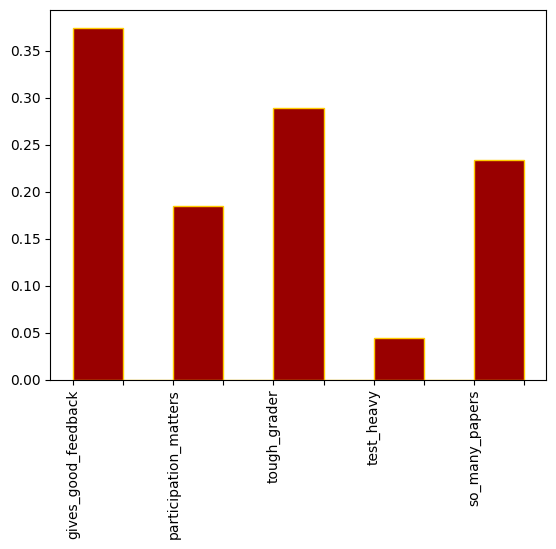

In [8]:
bins = ['gives_good_feedback',' ',
       'participation_matters','  ',
       'tough_grader', '   ',
       'test_heavy', '    ',
       'so_many_papers','     ',
       ]
counts = [0.374834, 0, 0.184374,0, 0.289443, 0,0.043784, 0,0.233463]
# print(data.drop(columns=['comment', 'star_rating', 'course_difficulty']).sum(axis=0))
# print(f"Number of tags per comment:\n{data.drop(columns=['comment', 'star_rating', 'course_difficulty']).sum(axis=1).value_counts()}")
plt.hist(bins[:-1], bins, weights=counts, edgecolor='#FFCC00', color='#990000',)

plt.xticks(rotation=90)
plt.show()